In [ ]:
import pandas as pd


In [ ]:
file_id='#'
downloaded = drive.CreateFile({'id': file_id})
print('title: %s, mimeType: %s' % (downloaded['title'], downloaded['mimeType']))
downloaded.GetContentFile(downloaded['title'],mimetype='application/vnd.openxmlformats-officedocument.spreadsheetml.sheet')

df = pd.read_excel(downloaded['title'],sheet_name='Hoja1')

title: HERMOSILLO_ESTANDARIZADO_ENF0.xlsx, mimeType: application/vnd.openxmlformats-officedocument.spreadsheetml.sheet


In [ ]:
df = pd.get_dummies(df, columns=['GPO EDAD'])

In [ ]:
df = df.drop(df.columns[[0, 1, 2]], axis=1)

In [ ]:
df = df[[ 'DIABETES', 'SEXO', 'GPO EDAD_0', 'GPO EDAD_1', 'GPO EDAD_2', 'GPO EDAD_3', 'GPO EDAD_4', 'GPO EDAD_5', 'GPO EDAD_6', 'GPO EDAD_7',
         'GPO EDAD_8', 'GPO EDAD_9', 'GPO EDAD_10', 'GPO EDAD_11', 'GPO EDAD_12', 'GPO EDAD_13', 'ESPOSA', 'ESPOSO', 'HIJA', 'HIJO', 'MADRE', 'PADRE',
         'CARDIOVASCULAR', 'GASTROPARESIA', 'NEFROPATIA', 'NEUROPATIA', 'AUDITIVA', 'PIEL', 'OCULAR', 'ATROPATIA', 'OBESIDAD', 'ASEGURADO']]

In [ ]:
#obtenemos las columnas del dataframe
columnas = list(df.columns.values)
columnas

['DIABETES',
 'SEXO',
 'GPO EDAD_0',
 'GPO EDAD_1',
 'GPO EDAD_2',
 'GPO EDAD_3',
 'GPO EDAD_4',
 'GPO EDAD_5',
 'GPO EDAD_6',
 'GPO EDAD_7',
 'GPO EDAD_8',
 'GPO EDAD_9',
 'GPO EDAD_10',
 'GPO EDAD_11',
 'GPO EDAD_12',
 'GPO EDAD_13',
 'ESPOSA',
 'ESPOSO',
 'HIJA',
 'HIJO',
 'MADRE',
 'PADRE',
 'CARDIOVASCULAR',
 'GASTROPARESIA',
 'NEFROPATIA',
 'NEUROPATIA',
 'AUDITIVA',
 'PIEL',
 'OCULAR',
 'ATROPATIA',
 'OBESIDAD',
 'ASEGURADO']

### Standardize the Data

In [ ]:
from sklearn.preprocessing import StandardScaler

# Separating out the features
x = df.loc[:, columnas].values

# Separating out the target
#y = df.loc[:,['target']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [ ]:
pd.DataFrame(data = x, columns = columnas).head()

,DIABETES,SEXO,GPO EDAD_0,GPO EDAD_1,GPO EDAD_2,GPO EDAD_3,GPO EDAD_4,GPO EDAD_5,GPO EDAD_6,GPO EDAD_7,GPO EDAD_8,GPO EDAD_9,GPO EDAD_10,GPO EDAD_11,GPO EDAD_12,GPO EDAD_13,ESPOSA,ESPOSO,HIJA,HIJO,MADRE,PADRE,CARDIOVASCULAR,GASTROPARESIA,NEFROPATIA,NEUROPATIA,AUDITIVA,PIEL,OCULAR,ATROPATIA,OBESIDAD,ASEGURADO
0,-0.176530,-1.106649,-0.286247,-0.348339,-0.381742,-0.346637,-0.215831,-0.160536,-0.243534,-0.283025,-0.301051,-0.284839,-0.255000,-0.235652,-0.203954,3.643072,-0.672244,-0.514199,-0.547144,-0.549473,-0.095125,16.495145,-0.145657,-0.111046,-0.080332,-0.066774,-0.058347,-0.057698,-0.027072,-0.021875,-0.016854,-0.718879
1,-0.176530,0.903629,-0.286247,-0.348339,-0.381742,-0.346637,-0.215831,-0.160536,-0.243534,-0.283025,-0.301051,-0.284839,-0.255000,-0.235652,-0.203954,3.643072,-0.672244,-0.514199,-0.547144,-0.549473,10.512453,-0.060624,6.865459,-0.111046,-0.080332,-0.066774,-0.058347,-0.057698,-0.027072,-0.021875,-0.016854,-0.718879
2,-0.176530,0.903629,-0.286247,-0.348339,-0.381742,-0.346637,-0.215831,-0.160536,-0.243534,-0.283025,-0.301051,-0.284839,-0.255000,-0.235652,-0.203954,3.643072,-0.672244,-0.514199,-0.547144,-0.549473,-0.095125,-0.060624,-0.145657,-0.111046,-0.080332,-0.066774,-0.058347,-0.057698,-0.027072,-0.021875,-0.016854,-0.718879
3,-0.176530,0.903629,-0.286247,-0.348339,-0.381742,-0.346637,-0.215831,-0.160536,-0.243534,-0.283025,-0.301051,-0.284839,3.921569,-0.235652,-0.203954,-0.274494,1.487555,-0.514199,-0.547144,-0.549473,-0.095125,-0.060624,-0.145657,-0.111046,-0.080332,-0.066774,-0.058347,-0.057698,-0.027072,-0.021875,-0.016854,1.391054
4,5.664761,-1.106649,-0.286247,-0.348339,-0.381742,-0.346637,-0.215831,-0.160536,-0.243534,-0.283025,-0.301051,-0.284839,3.921569,-0.235652,-0.203954,-0.274494,-0.672244,1.944774,-0.547144,-0.549473,-0.095125,-0.060624,-0.145657,-0.111046,-0.080332,-0.066774,-0.058347,-0.057698,-0.027072,-0.021875,-0.016854,1.391054


### The next step is to rescale our data to a range between 0 and 1, with MinMaxScaler from sklearn

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [ ]:
scaler = MinMaxScaler(feature_range=[0, 1])
df_rescaled = scaler.fit_transform(df.iloc[1:, 0:32])

### Calculate the explained variance for each attribute by using scikit-learn, and plot the result

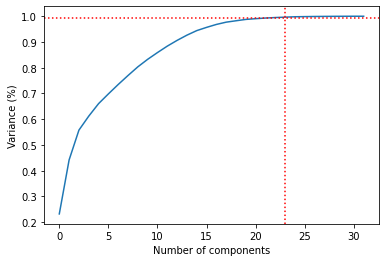

In [ ]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(df_rescaled)

#Plotting the Cumulative Summation of the Explained Variance
acp = plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Variance (%)') #for each component
plt.axvline(x=23, c='r', ls='dotted')
plt.axhline(y=0.9949573498715483, c='r', ls='dotted')
acp.show()

In [ ]:
pca = PCA(n_components=23)
dataset = pca.fit_transform(df_rescaled)

In [ ]:
print(np.sum(pca.explained_variance_ratio_))